In [30]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import cmocean as cm
import pipvis as vp
from importlib import reload

import sys
sys.path.append('./extraction_scripts')
import map_fxn as mf
reload(vp)
plt.rcParams.update({'font.size': 15})

In [31]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

## Understanding 

In [32]:
bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:]) 

stn_x, stn_y = mf.make_stns(10)
d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

d_stn_xar = np.array(d_stn_x)
d_stn_yar = np.array(d_stn_y)

edge = np.where((d_stn_xar<=10) | (d_stn_yar>=888))
np.squeeze(edge)
np.shape(edge)
edgear = np.array(edge)
edgear = edgear[0]

d_stn_xar =np.delete(d_stn_xar,edge)
d_stn_yar = np.delete(d_stn_yar,edge)

#print(np.size(d_stn_xar))
#print(edge)
# d_stn_y[41]

stn_ids = np.arange(0,580)
stn_ids_edgeout = np.delete(stn_ids,edge)

xs = pickle.load(open('./pkls/Xcoords_for571_stations.pkl', 'rb')) 
ys = pickle.load(open('./pkls/Ycoords_for571_stations.pkl', 'rb')) 


In [33]:
#load clustering

BIO_cl_2013 = pickle.load(open('./pkls/BIO_clno_5_2013_reass.pkl', 'rb'))  
BIO_cl_2014 = pickle.load(open('./pkls/BIO_clno_5_2014_reass.pkl', 'rb'))  
BIO_cl_2015 = pickle.load(open('./pkls/BIO_clno_5_2015_reass.pkl', 'rb'))  
BIO_cl_2016 = pickle.load(open('./pkls/BIO_clno_5_2016_reass.pkl', 'rb'))  

BIO_stns_cl_1_2013 = stn_ids_edgeout[BIO_cl_2013 == 1]
BIO_stns_cl_2_2013 = stn_ids_edgeout[BIO_cl_2013 == 2]
BIO_stns_cl_3_2013 = stn_ids_edgeout[BIO_cl_2013 == 3]
BIO_stns_cl_4_2013 = stn_ids_edgeout[BIO_cl_2013 == 4]
BIO_stns_cl_5_2013 = stn_ids_edgeout[BIO_cl_2013 == 5]
BIO_stns_cl_1_2014 = stn_ids_edgeout[BIO_cl_2014 == 1]
BIO_stns_cl_2_2014 = stn_ids_edgeout[BIO_cl_2014 == 2]
BIO_stns_cl_3_2014 = stn_ids_edgeout[BIO_cl_2014 == 3]
BIO_stns_cl_4_2014 = stn_ids_edgeout[BIO_cl_2014 == 4]
BIO_stns_cl_5_2014 = stn_ids_edgeout[BIO_cl_2014 == 5]
BIO_stns_cl_1_2015 = stn_ids_edgeout[BIO_cl_2015 == 1]
BIO_stns_cl_2_2015 = stn_ids_edgeout[BIO_cl_2015 == 2]
BIO_stns_cl_3_2015 = stn_ids_edgeout[BIO_cl_2015 == 3]
BIO_stns_cl_4_2015 = stn_ids_edgeout[BIO_cl_2015 == 4]
BIO_stns_cl_5_2015 = stn_ids_edgeout[BIO_cl_2015 == 5]
BIO_stns_cl_1_2016 = stn_ids_edgeout[BIO_cl_2016 == 1]
BIO_stns_cl_2_2016 = stn_ids_edgeout[BIO_cl_2016 == 2]
BIO_stns_cl_3_2016 = stn_ids_edgeout[BIO_cl_2016 == 3]
BIO_stns_cl_4_2016 = stn_ids_edgeout[BIO_cl_2016 == 4]
BIO_stns_cl_5_2016 = stn_ids_edgeout[BIO_cl_2016 == 5]


In [34]:
#load clustering

VED_cl_2013 = pickle.load(open('./pkls/VED_clno_5_2013_reass.pkl', 'rb'))  
VED_cl_2014 = pickle.load(open('./pkls/VED_clno_5_2014_reass.pkl', 'rb'))  
VED_cl_2015 = pickle.load(open('./pkls/VED_clno_5_2015_reass.pkl', 'rb'))  
VED_cl_2016 = pickle.load(open('./pkls/VED_clno_5_2016_reass.pkl', 'rb'))  

VED_stns_cl_1_2013 = stn_ids_edgeout[VED_cl_2013 == 1]
VED_stns_cl_2_2013 = stn_ids_edgeout[VED_cl_2013 == 2]
VED_stns_cl_3_2013 = stn_ids_edgeout[VED_cl_2013 == 3]
VED_stns_cl_4_2013 = stn_ids_edgeout[VED_cl_2013 == 4]
VED_stns_cl_5_2013 = stn_ids_edgeout[VED_cl_2013 == 5]
VED_stns_cl_1_2014 = stn_ids_edgeout[VED_cl_2014 == 1]
VED_stns_cl_2_2014 = stn_ids_edgeout[VED_cl_2014 == 2]
VED_stns_cl_3_2014 = stn_ids_edgeout[VED_cl_2014 == 3]
VED_stns_cl_4_2014 = stn_ids_edgeout[VED_cl_2014 == 4]
VED_stns_cl_5_2014 = stn_ids_edgeout[VED_cl_2014 == 5]
VED_stns_cl_1_2015 = stn_ids_edgeout[VED_cl_2015 == 1]
VED_stns_cl_2_2015 = stn_ids_edgeout[VED_cl_2015 == 2]
VED_stns_cl_3_2015 = stn_ids_edgeout[VED_cl_2015 == 3]
VED_stns_cl_4_2015 = stn_ids_edgeout[VED_cl_2015 == 4]
VED_stns_cl_5_2015 = stn_ids_edgeout[VED_cl_2015 == 5]
VED_stns_cl_1_2016 = stn_ids_edgeout[VED_cl_2016 == 1]
VED_stns_cl_2_2016 = stn_ids_edgeout[VED_cl_2016 == 2]
VED_stns_cl_3_2016 = stn_ids_edgeout[VED_cl_2016 == 3]
VED_stns_cl_4_2016 = stn_ids_edgeout[VED_cl_2016 == 4]
VED_stns_cl_5_2016 = stn_ids_edgeout[VED_cl_2016 == 5]

#load clustering

FWI_cl_2013 = pickle.load(open('./pkls/FWI_clno_5_2013_reass.pkl', 'rb'))  
FWI_cl_2014 = pickle.load(open('./pkls/FWI_clno_5_2014_reass.pkl', 'rb'))  
FWI_cl_2015 = pickle.load(open('./pkls/FWI_clno_5_2015_reass.pkl', 'rb'))  
FWI_cl_2016 = pickle.load(open('./pkls/FWI_clno_5_2016_reass.pkl', 'rb'))  

FWI_stns_cl_1_2013 = stn_ids_edgeout[FWI_cl_2013 == 1]
FWI_stns_cl_2_2013 = stn_ids_edgeout[FWI_cl_2013 == 2]
FWI_stns_cl_3_2013 = stn_ids_edgeout[FWI_cl_2013 == 3]
FWI_stns_cl_4_2013 = stn_ids_edgeout[FWI_cl_2013 == 4]
FWI_stns_cl_5_2013 = stn_ids_edgeout[FWI_cl_2013 == 5]
FWI_stns_cl_1_2014 = stn_ids_edgeout[FWI_cl_2014 == 1]
FWI_stns_cl_2_2014 = stn_ids_edgeout[FWI_cl_2014 == 2]
FWI_stns_cl_3_2014 = stn_ids_edgeout[FWI_cl_2014 == 3]
FWI_stns_cl_4_2014 = stn_ids_edgeout[FWI_cl_2014 == 4]
FWI_stns_cl_5_2014 = stn_ids_edgeout[FWI_cl_2014 == 5]
FWI_stns_cl_1_2015 = stn_ids_edgeout[FWI_cl_2015 == 1]
FWI_stns_cl_2_2015 = stn_ids_edgeout[FWI_cl_2015 == 2]
FWI_stns_cl_3_2015 = stn_ids_edgeout[FWI_cl_2015 == 3]
FWI_stns_cl_4_2015 = stn_ids_edgeout[FWI_cl_2015 == 4]
FWI_stns_cl_5_2015 = stn_ids_edgeout[FWI_cl_2015 == 5]
FWI_stns_cl_1_2016 = stn_ids_edgeout[FWI_cl_2016 == 1]
FWI_stns_cl_2_2016 = stn_ids_edgeout[FWI_cl_2016 == 2]
FWI_stns_cl_3_2016 = stn_ids_edgeout[FWI_cl_2016 == 3]
FWI_stns_cl_4_2016 = stn_ids_edgeout[FWI_cl_2016 == 4]
FWI_stns_cl_5_2016 = stn_ids_edgeout[FWI_cl_2016 == 5]


In [35]:
HALO_cl_2013 = pickle.load(open('./pkls/HALO_clno_5_2013_reass.pkl', 'rb'))  
HALO_cl_2014 = pickle.load(open('./pkls/HALO_clno_5_2014_reass.pkl', 'rb'))  
HALO_cl_2015 = pickle.load(open('./pkls/HALO_clno_5_2015_reass.pkl', 'rb'))  
HALO_cl_2016 = pickle.load(open('./pkls/HALO_clno_5_2016_reass.pkl', 'rb'))  

HALO_stns_cl_1_2013 = stn_ids_edgeout[HALO_cl_2013 == 1]
HALO_stns_cl_2_2013 = stn_ids_edgeout[HALO_cl_2013 == 2]
HALO_stns_cl_3_2013 = stn_ids_edgeout[HALO_cl_2013 == 3]
HALO_stns_cl_4_2013 = stn_ids_edgeout[HALO_cl_2013 == 4]
HALO_stns_cl_5_2013 = stn_ids_edgeout[HALO_cl_2013 == 5]
HALO_stns_cl_1_2014 = stn_ids_edgeout[HALO_cl_2014 == 1]
HALO_stns_cl_2_2014 = stn_ids_edgeout[HALO_cl_2014 == 2]
HALO_stns_cl_3_2014 = stn_ids_edgeout[HALO_cl_2014 == 3]
HALO_stns_cl_4_2014 = stn_ids_edgeout[HALO_cl_2014 == 4]
HALO_stns_cl_5_2014 = stn_ids_edgeout[HALO_cl_2014 == 5]
HALO_stns_cl_1_2015 = stn_ids_edgeout[HALO_cl_2015 == 1]
HALO_stns_cl_2_2015 = stn_ids_edgeout[HALO_cl_2015 == 2]
HALO_stns_cl_3_2015 = stn_ids_edgeout[HALO_cl_2015 == 3]
HALO_stns_cl_4_2015 = stn_ids_edgeout[HALO_cl_2015 == 4]
HALO_stns_cl_5_2015 = stn_ids_edgeout[HALO_cl_2015 == 5]
HALO_stns_cl_1_2016 = stn_ids_edgeout[HALO_cl_2016 == 1]
HALO_stns_cl_2_2016 = stn_ids_edgeout[HALO_cl_2016 == 2]
HALO_stns_cl_3_2016 = stn_ids_edgeout[HALO_cl_2016 == 3]
HALO_stns_cl_4_2016 = stn_ids_edgeout[HALO_cl_2016 == 4]
HALO_stns_cl_5_2016 = stn_ids_edgeout[HALO_cl_2016 == 5]

WIND_cl_2013 = pickle.load(open('./pkls/WIND_clno_5_2013_reass.pkl', 'rb'))  
WIND_cl_2014 = pickle.load(open('./pkls/WIND_clno_5_2014_reass.pkl', 'rb'))  
WIND_cl_2015 = pickle.load(open('./pkls/WIND_clno_5_2015_reass.pkl', 'rb'))  
WIND_cl_2016 = pickle.load(open('./pkls/WIND_clno_5_2016_reass.pkl', 'rb'))  

WIND_stns_cl_1_2013 = stn_ids_edgeout[WIND_cl_2013 == 1]
WIND_stns_cl_2_2013 = stn_ids_edgeout[WIND_cl_2013 == 2]
WIND_stns_cl_3_2013 = stn_ids_edgeout[WIND_cl_2013 == 3]
WIND_stns_cl_4_2013 = stn_ids_edgeout[WIND_cl_2013 == 4]
WIND_stns_cl_5_2013 = stn_ids_edgeout[WIND_cl_2013 == 5]
WIND_stns_cl_1_2014 = stn_ids_edgeout[WIND_cl_2014 == 1]
WIND_stns_cl_2_2014 = stn_ids_edgeout[WIND_cl_2014 == 2]
WIND_stns_cl_3_2014 = stn_ids_edgeout[WIND_cl_2014 == 3]
WIND_stns_cl_4_2014 = stn_ids_edgeout[WIND_cl_2014 == 4]
WIND_stns_cl_5_2014 = stn_ids_edgeout[WIND_cl_2014 == 5]
WIND_stns_cl_1_2015 = stn_ids_edgeout[WIND_cl_2015 == 1]
WIND_stns_cl_2_2015 = stn_ids_edgeout[WIND_cl_2015 == 2]
WIND_stns_cl_3_2015 = stn_ids_edgeout[WIND_cl_2015 == 3]
WIND_stns_cl_4_2015 = stn_ids_edgeout[WIND_cl_2015 == 4]
WIND_stns_cl_5_2015 = stn_ids_edgeout[WIND_cl_2015 == 5]
WIND_stns_cl_1_2016 = stn_ids_edgeout[WIND_cl_2016 == 1]
WIND_stns_cl_2_2016 = stn_ids_edgeout[WIND_cl_2016 == 2]
WIND_stns_cl_3_2016 = stn_ids_edgeout[WIND_cl_2016 == 3]
WIND_stns_cl_4_2016 = stn_ids_edgeout[WIND_cl_2016 == 4]
WIND_stns_cl_5_2016 = stn_ids_edgeout[WIND_cl_2016 == 5]

In [36]:
# for col in hplc_obs.columns: 
#     print(col) 


In [37]:
print('BIO')
BIO_overlaps_cl_1 = np.zeros([4,4])
ars = [BIO_stns_cl_1_2013,BIO_stns_cl_1_2014,BIO_stns_cl_1_2015,BIO_stns_cl_1_2016]
for i in range(0,4):
    BIO_overlaps_cl_1[0,i] = (len(np.intersect1d(BIO_stns_cl_1_2013,ars[i]))/
                              (0.5*(len(BIO_stns_cl_1_2013)+len(ars[i]))))
for i in range(0,4):
    BIO_overlaps_cl_1[1,i] = (len(np.intersect1d(BIO_stns_cl_1_2014,ars[i]))/
                              (0.5*(len(BIO_stns_cl_1_2014)+len(ars[i]))))
for i in range(0,4):
    BIO_overlaps_cl_1[2,i] = (len(np.intersect1d(BIO_stns_cl_1_2015,ars[i]))/
                              (0.5*(len(BIO_stns_cl_1_2015)+len(ars[i]))))
for i in range(0,4):
    BIO_overlaps_cl_1[3,i] = (len(np.intersect1d(BIO_stns_cl_1_2016,ars[i]))/
                              (0.5*(len(BIO_stns_cl_1_2016)+len(ars[i]))))
print('cl_1')    
for i in range(0,4):
    BIO_overlaps_cl_1[i,i] = np.nan
print(BIO_overlaps_cl_1)
print(np.nanmean(BIO_overlaps_cl_1))
#np.where(BIO_stns_cl_3_2013==BIO_stns_cl_3_2014)
BIO_overlaps_cl_2 = np.zeros([4,4])
ars = [BIO_stns_cl_2_2013,BIO_stns_cl_2_2014,BIO_stns_cl_2_2015,BIO_stns_cl_2_2016]
for i in range(0,4):
    BIO_overlaps_cl_2[0,i] = (len(np.intersect1d(BIO_stns_cl_2_2013,ars[i]))/
                              (0.5*(len(BIO_stns_cl_2_2013)+len(ars[i]))))
for i in range(0,4):
    BIO_overlaps_cl_2[1,i] = (len(np.intersect1d(BIO_stns_cl_2_2014,ars[i]))/
                              (0.5*(len(BIO_stns_cl_2_2014)+len(ars[i]))))
for i in range(0,4):
    BIO_overlaps_cl_2[2,i] = (len(np.intersect1d(BIO_stns_cl_2_2015,ars[i]))/
                              (0.5*(len(BIO_stns_cl_2_2015)+len(ars[i]))))
for i in range(0,4):
    BIO_overlaps_cl_2[3,i] = (len(np.intersect1d(BIO_stns_cl_2_2016,ars[i]))/
                              (0.5*(len(BIO_stns_cl_2_2016)+len(ars[i]))))

print('cl_2')    
print(BIO_overlaps_cl_2)
print(np.nanmean(BIO_overlaps_cl_2))
BIO_overlaps_cl_3 = np.zeros([4,4])
ars = [BIO_stns_cl_3_2013,BIO_stns_cl_3_2014,BIO_stns_cl_3_2015,BIO_stns_cl_3_2016]
for i in range(0,4):
    BIO_overlaps_cl_3[0,i] = (len(np.intersect1d(BIO_stns_cl_3_2013,ars[i]))/
                              (0.5*(len(BIO_stns_cl_3_2013)+len(ars[i]))))
for i in range(0,4):
    BIO_overlaps_cl_3[1,i] = (len(np.intersect1d(BIO_stns_cl_3_2014,ars[i]))/
                              (0.5*(len(BIO_stns_cl_3_2014)+len(ars[i]))))
for i in range(0,4):
    BIO_overlaps_cl_3[2,i] = (len(np.intersect1d(BIO_stns_cl_3_2015,ars[i]))/
                              (0.5*(len(BIO_stns_cl_3_2015)+len(ars[i]))))
for i in range(0,4):
    BIO_overlaps_cl_3[3,i] = (len(np.intersect1d(BIO_stns_cl_3_2016,ars[i]))/
                              (0.5*(len(BIO_stns_cl_3_2016)+len(ars[i]))))
print('cl 3')    
print(BIO_overlaps_cl_3)
print(np.nanmean(BIO_overlaps_cl_3))

BIO_overlaps_cl_4 = np.zeros([4,4])
ars = [BIO_stns_cl_4_2013,BIO_stns_cl_4_2014,BIO_stns_cl_4_2015,BIO_stns_cl_4_2016]
for i in range(0,4):
    BIO_overlaps_cl_4[0,i] = (len(np.intersect1d(BIO_stns_cl_4_2013,ars[i]))/
                              (0.5*(len(BIO_stns_cl_4_2013)+len(ars[i]))))
for i in range(0,4):
    BIO_overlaps_cl_4[1,i] = (len(np.intersect1d(BIO_stns_cl_4_2014,ars[i]))/
                              (0.5*(len(BIO_stns_cl_4_2014)+len(ars[i]))))
for i in range(0,4):
    BIO_overlaps_cl_4[2,i] = (len(np.intersect1d(BIO_stns_cl_4_2015,ars[i]))/
                              (0.5*(len(BIO_stns_cl_4_2015)+len(ars[i]))))
for i in range(0,4):
    BIO_overlaps_cl_4[3,i] = (len(np.intersect1d(BIO_stns_cl_4_2016,ars[i]))/
                              (0.5*(len(BIO_stns_cl_4_2016)+len(ars[i]))))
print('cl 4') 
for i in range(0,4):
    BIO_overlaps_cl_4[i,i] = np.nan
print(BIO_overlaps_cl_4)
print(np.nanmean(BIO_overlaps_cl_4))

BIO_overlaps_cl_5 = np.zeros([4,4])
ars = [BIO_stns_cl_5_2013,BIO_stns_cl_5_2014,BIO_stns_cl_5_2015,BIO_stns_cl_5_2016]
for i in range(0,4):
    BIO_overlaps_cl_5[0,i] = (len(np.intersect1d(BIO_stns_cl_5_2013,ars[i]))/
                              (0.5*(len(BIO_stns_cl_5_2013)+len(ars[i]))))
for i in range(0,4):
    BIO_overlaps_cl_5[1,i] = (len(np.intersect1d(BIO_stns_cl_5_2014,ars[i]))/
                              (0.5*(len(BIO_stns_cl_5_2014)+len(ars[i]))))
for i in range(0,4):
    BIO_overlaps_cl_5[2,i] = (len(np.intersect1d(BIO_stns_cl_5_2015,ars[i]))/
                              (0.5*(len(BIO_stns_cl_5_2015)+len(ars[i]))))
for i in range(0,4):
    BIO_overlaps_cl_5[3,i] = (len(np.intersect1d(BIO_stns_cl_5_2016,ars[i]))/
                              (0.5*(len(BIO_stns_cl_5_2016)+len(ars[i]))))
print('cl 5')
for i in range(0,4):
    BIO_overlaps_cl_5[i,i] = np.nan
print(BIO_overlaps_cl_5)
print(np.nanmean(BIO_overlaps_cl_5))

BIO
cl_1
[[       nan 1.         0.95652174 0.87179487]
 [1.                nan 0.95652174 0.87179487]
 [0.95652174 0.95652174        nan 0.82926829]
 [0.87179487 0.87179487 0.82926829        nan]]
0.9143169190889232
cl_2
[[1.         0.53211009 0.54545455 0.74853801]
 [0.53211009 1.         0.98305085 0.48333333]
 [0.54545455 0.98305085 1.         0.49586777]
 [0.74853801 0.48333333 0.49586777 1.        ]]
0.7235443247849467
cl 3
[[1.         0.90714286 0.83677298 0.86065574]
 [0.90714286 1.         0.91161179 0.83834586]
 [0.83677298 0.91161179 1.         0.87920792]
 [0.86065574 0.83834586 0.87920792 1.        ]]
0.9042171435639095
cl 4
[[       nan 0.81578947 0.60194175 0.57142857]
 [0.81578947        nan 0.57142857 0.52631579]
 [0.60194175 0.57142857        nan 0.87943262]
 [0.57142857 0.52631579 0.87943262        nan]]
0.6610561296168881
cl 5
[[       nan 0.9631728  0.94857143 0.91566265]
 [0.9631728         nan 0.92394366 0.87833828]
 [0.94857143 0.92394366        nan 0.90419162

In [46]:
print(HALO_stns_cl_2_2014)
print(HALO_stns_cl_2_2016)

[ 38  44  45  46  47  53  54  55  56  59  60  61  62  65  66  67  72  73
  77  78  81  82  91  92  93 105 106 126]
[  9  10  13  15  16  17  20  22  23  24  27  29  30  31  34  40  42  48
  51  57  70  75  80  90  94 104 124 147 148 168 169 170 193 198 216 219
 232 233 236 253 254 255 258 278 279 280 286 287 310 313 323 345 347 355
 376 381 403 430 431 455 479]


In [39]:
print('HALO')
HALO_overlaps_cl_1 = np.zeros([4,4])
ars = [HALO_stns_cl_1_2013,HALO_stns_cl_1_2014,HALO_stns_cl_1_2015,HALO_stns_cl_1_2016]
for i in range(0,4):
    HALO_overlaps_cl_1[0,i] = (len(np.intersect1d(HALO_stns_cl_1_2013,ars[i]))/
                              (0.5*(len(HALO_stns_cl_1_2013)+len(ars[i]))))
for i in range(0,4):
    HALO_overlaps_cl_1[1,i] = (len(np.intersect1d(HALO_stns_cl_1_2014,ars[i]))/
                              (0.5*(len(HALO_stns_cl_1_2014)+len(ars[i]))))
for i in range(0,4):
    HALO_overlaps_cl_1[2,i] = (len(np.intersect1d(HALO_stns_cl_1_2015,ars[i]))/
                              (0.5*(len(HALO_stns_cl_1_2015)+len(ars[i]))))
for i in range(0,4):
    HALO_overlaps_cl_1[3,i] = (len(np.intersect1d(HALO_stns_cl_1_2016,ars[i]))/
                              (0.5*(len(HALO_stns_cl_1_2016)+len(ars[i]))))
print('cl_1')    
for i in range(0,4):
    HALO_overlaps_cl_1[i,i] = np.nan
print(HALO_overlaps_cl_1)
print(np.nanmean(HALO_overlaps_cl_1))
#np.where(HALO_stns_cl_3_2013==HALO_stns_cl_3_2014)
HALO_overlaps_cl_2 = np.zeros([4,4])
ars = [HALO_stns_cl_2_2013,HALO_stns_cl_2_2014,HALO_stns_cl_2_2015,HALO_stns_cl_2_2016]
for i in range(0,4):
    HALO_overlaps_cl_2[0,i] = (len(np.intersect1d(HALO_stns_cl_2_2013,ars[i]))/
                              (0.5*(len(HALO_stns_cl_2_2013)+len(ars[i]))))
for i in range(0,4):
    HALO_overlaps_cl_2[1,i] = (len(np.intersect1d(HALO_stns_cl_2_2014,ars[i]))/
                              (0.5*(len(HALO_stns_cl_2_2014)+len(ars[i]))))
for i in range(0,4):
    HALO_overlaps_cl_2[2,i] = (len(np.intersect1d(HALO_stns_cl_2_2015,ars[i]))/
                              (0.5*(len(HALO_stns_cl_2_2015)+len(ars[i]))))
for i in range(0,4):
    HALO_overlaps_cl_2[3,i] = (len(np.intersect1d(HALO_stns_cl_2_2016,ars[i]))/
                              (0.5*(len(HALO_stns_cl_2_2016)+len(ars[i]))))

print('cl_2')    
print(HALO_overlaps_cl_2)
print(np.nanmean(HALO_overlaps_cl_2))
HALO_overlaps_cl_3 = np.zeros([4,4])
ars = [HALO_stns_cl_3_2013,HALO_stns_cl_3_2014,HALO_stns_cl_3_2015,HALO_stns_cl_3_2016]
for i in range(0,4):
    HALO_overlaps_cl_3[0,i] = (len(np.intersect1d(HALO_stns_cl_3_2013,ars[i]))/
                              (0.5*(len(HALO_stns_cl_3_2013)+len(ars[i]))))
for i in range(0,4):
    HALO_overlaps_cl_3[1,i] = (len(np.intersect1d(HALO_stns_cl_3_2014,ars[i]))/
                              (0.5*(len(HALO_stns_cl_3_2014)+len(ars[i]))))
for i in range(0,4):
    HALO_overlaps_cl_3[2,i] = (len(np.intersect1d(HALO_stns_cl_3_2015,ars[i]))/
                              (0.5*(len(HALO_stns_cl_3_2015)+len(ars[i]))))
for i in range(0,4):
    HALO_overlaps_cl_3[3,i] = (len(np.intersect1d(HALO_stns_cl_3_2016,ars[i]))/
                              (0.5*(len(HALO_stns_cl_3_2016)+len(ars[i]))))
print('cl 3')    
print(HALO_overlaps_cl_3)
print(np.nanmean(HALO_overlaps_cl_3))

HALO_overlaps_cl_4 = np.zeros([4,4])
ars = [HALO_stns_cl_4_2013,HALO_stns_cl_4_2014,HALO_stns_cl_4_2015,HALO_stns_cl_4_2016]
for i in range(0,4):
    HALO_overlaps_cl_4[0,i] = (len(np.intersect1d(HALO_stns_cl_4_2013,ars[i]))/
                              (0.5*(len(HALO_stns_cl_4_2013)+len(ars[i]))))
for i in range(0,4):
    HALO_overlaps_cl_4[1,i] = (len(np.intersect1d(HALO_stns_cl_4_2014,ars[i]))/
                              (0.5*(len(HALO_stns_cl_4_2014)+len(ars[i]))))
for i in range(0,4):
    HALO_overlaps_cl_4[2,i] = (len(np.intersect1d(HALO_stns_cl_4_2015,ars[i]))/
                              (0.5*(len(HALO_stns_cl_4_2015)+len(ars[i]))))
for i in range(0,4):
    HALO_overlaps_cl_4[3,i] = (len(np.intersect1d(HALO_stns_cl_4_2016,ars[i]))/
                              (0.5*(len(HALO_stns_cl_4_2016)+len(ars[i]))))
print('cl 4') 
for i in range(0,4):
    HALO_overlaps_cl_4[i,i] = np.nan
print(HALO_overlaps_cl_4)
print(np.nanmean(HALO_overlaps_cl_4))

HALO_overlaps_cl_5 = np.zeros([4,4])
ars = [HALO_stns_cl_5_2013,HALO_stns_cl_5_2014,HALO_stns_cl_5_2015,HALO_stns_cl_5_2016]
for i in range(0,4):
    HALO_overlaps_cl_5[0,i] = (len(np.intersect1d(HALO_stns_cl_5_2013,ars[i]))/
                              (0.5*(len(HALO_stns_cl_5_2013)+len(ars[i]))))
for i in range(0,4):
    HALO_overlaps_cl_5[1,i] = (len(np.intersect1d(HALO_stns_cl_5_2014,ars[i]))/
                              (0.5*(len(HALO_stns_cl_5_2014)+len(ars[i]))))
for i in range(0,4):
    HALO_overlaps_cl_5[2,i] = (len(np.intersect1d(HALO_stns_cl_5_2015,ars[i]))/
                              (0.5*(len(HALO_stns_cl_5_2015)+len(ars[i]))))
for i in range(0,4):
    HALO_overlaps_cl_5[3,i] = (len(np.intersect1d(HALO_stns_cl_5_2016,ars[i]))/
                              (0.5*(len(HALO_stns_cl_5_2016)+len(ars[i]))))
print('cl 5')
for i in range(0,4):
    HALO_overlaps_cl_5[i,i] = np.nan
print(HALO_overlaps_cl_5)
print(np.nanmean(HALO_overlaps_cl_5))






HALO
cl_1
[[       nan 0.6        0.71232877 0.59375   ]
 [0.6               nan 0.50909091 0.30434783]
 [0.71232877 0.50909091        nan 0.81632653]
 [0.59375    0.30434783 0.81632653        nan]]
0.5893073388188997
cl_2
[[1.        0.8358209 0.6779661 0.       ]
 [0.8358209 1.        0.625     0.       ]
 [0.6779661 0.625     1.        0.       ]
 [0.        0.        0.        1.       ]]
0.5173483746521629
cl 3
[[1.         0.9717362  0.95805142 0.96326531]
 [0.9717362  1.         0.96205962 0.96457766]
 [0.95805142 0.96205962 1.         0.96164384]
 [0.96326531 0.96457766 0.96164384 1.        ]]
0.9726667555532322
cl 4
[[       nan 0.85714286 0.79425837 0.625     ]
 [0.85714286        nan 0.82464455 0.65432099]
 [0.79425837 0.82464455        nan 0.60571429]
 [0.625      0.65432099 0.60571429        nan]]
0.7268468422467064
cl 5
[[       nan 0.57575758 0.58064516 0.45783133]
 [0.57575758        nan 0.46666667 0.46846847]
 [0.58064516 0.46666667        nan 0.76635514]
 [0.45783133 

In [40]:
print('VED')
VED_overlaps_cl_1 = np.zeros([4,4])
ars = [VED_stns_cl_1_2013,VED_stns_cl_1_2014,VED_stns_cl_1_2015,VED_stns_cl_1_2016]
for i in range(0,4):
    VED_overlaps_cl_1[0,i] = (len(np.intersect1d(VED_stns_cl_1_2013,ars[i]))/
                              (0.5*(len(VED_stns_cl_1_2013)+len(ars[i]))))
for i in range(0,4):
    VED_overlaps_cl_1[1,i] = (len(np.intersect1d(VED_stns_cl_1_2014,ars[i]))/
                              (0.5*(len(VED_stns_cl_1_2014)+len(ars[i]))))
for i in range(0,4):
    VED_overlaps_cl_1[2,i] = (len(np.intersect1d(VED_stns_cl_1_2015,ars[i]))/
                              (0.5*(len(VED_stns_cl_1_2015)+len(ars[i]))))
for i in range(0,4):
    VED_overlaps_cl_1[3,i] = (len(np.intersect1d(VED_stns_cl_1_2016,ars[i]))/
                              (0.5*(len(VED_stns_cl_1_2016)+len(ars[i]))))
print('cl_1')    
for i in range(0,4):
    VED_overlaps_cl_1[i,i] = np.nan
print(VED_overlaps_cl_1)
print(np.nanmean(VED_overlaps_cl_1))
#np.where(VED_stns_cl_3_2013==VED_stns_cl_3_2014)
VED_overlaps_cl_2 = np.zeros([4,4])
ars = [VED_stns_cl_2_2013,VED_stns_cl_2_2014,VED_stns_cl_2_2015,VED_stns_cl_2_2016]
for i in range(0,4):
    VED_overlaps_cl_2[0,i] = (len(np.intersect1d(VED_stns_cl_2_2013,ars[i]))/
                              (0.5*(len(VED_stns_cl_2_2013)+len(ars[i]))))
for i in range(0,4):
    VED_overlaps_cl_2[1,i] = (len(np.intersect1d(VED_stns_cl_2_2014,ars[i]))/
                              (0.5*(len(VED_stns_cl_2_2014)+len(ars[i]))))
for i in range(0,4):
    VED_overlaps_cl_2[2,i] = (len(np.intersect1d(VED_stns_cl_2_2015,ars[i]))/
                              (0.5*(len(VED_stns_cl_2_2015)+len(ars[i]))))
for i in range(0,4):
    VED_overlaps_cl_2[3,i] = (len(np.intersect1d(VED_stns_cl_2_2016,ars[i]))/
                              (0.5*(len(VED_stns_cl_2_2016)+len(ars[i]))))

print('cl_2')    
print(VED_overlaps_cl_2)
print(np.nanmean(VED_overlaps_cl_2))
VED_overlaps_cl_3 = np.zeros([4,4])
ars = [VED_stns_cl_3_2013,VED_stns_cl_3_2014,VED_stns_cl_3_2015,VED_stns_cl_3_2016]
for i in range(0,4):
    VED_overlaps_cl_3[0,i] = (len(np.intersect1d(VED_stns_cl_3_2013,ars[i]))/
                              (0.5*(len(VED_stns_cl_3_2013)+len(ars[i]))))
for i in range(0,4):
    VED_overlaps_cl_3[1,i] = (len(np.intersect1d(VED_stns_cl_3_2014,ars[i]))/
                              (0.5*(len(VED_stns_cl_3_2014)+len(ars[i]))))
for i in range(0,4):
    VED_overlaps_cl_3[2,i] = (len(np.intersect1d(VED_stns_cl_3_2015,ars[i]))/
                              (0.5*(len(VED_stns_cl_3_2015)+len(ars[i]))))
for i in range(0,4):
    VED_overlaps_cl_3[3,i] = (len(np.intersect1d(VED_stns_cl_3_2016,ars[i]))/
                              (0.5*(len(VED_stns_cl_3_2016)+len(ars[i]))))
print('cl 3')    
print(VED_overlaps_cl_3)
print(np.nanmean(VED_overlaps_cl_3))

VED_overlaps_cl_4 = np.zeros([4,4])
ars = [VED_stns_cl_4_2013,VED_stns_cl_4_2014,VED_stns_cl_4_2015,VED_stns_cl_4_2016]
for i in range(0,4):
    VED_overlaps_cl_4[0,i] = (len(np.intersect1d(VED_stns_cl_4_2013,ars[i]))/
                              (0.5*(len(VED_stns_cl_4_2013)+len(ars[i]))))
for i in range(0,4):
    VED_overlaps_cl_4[1,i] = (len(np.intersect1d(VED_stns_cl_4_2014,ars[i]))/
                              (0.5*(len(VED_stns_cl_4_2014)+len(ars[i]))))
for i in range(0,4):
    VED_overlaps_cl_4[2,i] = (len(np.intersect1d(VED_stns_cl_4_2015,ars[i]))/
                              (0.5*(len(VED_stns_cl_4_2015)+len(ars[i]))))
for i in range(0,4):
    VED_overlaps_cl_4[3,i] = (len(np.intersect1d(VED_stns_cl_4_2016,ars[i]))/
                              (0.5*(len(VED_stns_cl_4_2016)+len(ars[i]))))
print('cl 4') 
for i in range(0,4):
    VED_overlaps_cl_4[i,i] = np.nan
print(VED_overlaps_cl_4)
print(np.nanmean(VED_overlaps_cl_4))

VED_overlaps_cl_5 = np.zeros([4,4])
ars = [VED_stns_cl_5_2013,VED_stns_cl_5_2014,VED_stns_cl_5_2015,VED_stns_cl_5_2016]
for i in range(0,4):
    VED_overlaps_cl_5[0,i] = (len(np.intersect1d(VED_stns_cl_5_2013,ars[i]))/
                              (0.5*(len(VED_stns_cl_5_2013)+len(ars[i]))))
for i in range(0,4):
    VED_overlaps_cl_5[1,i] = (len(np.intersect1d(VED_stns_cl_5_2014,ars[i]))/
                              (0.5*(len(VED_stns_cl_5_2014)+len(ars[i]))))
for i in range(0,4):
    VED_overlaps_cl_5[2,i] = (len(np.intersect1d(VED_stns_cl_5_2015,ars[i]))/
                              (0.5*(len(VED_stns_cl_5_2015)+len(ars[i]))))
for i in range(0,4):
    VED_overlaps_cl_5[3,i] = (len(np.intersect1d(VED_stns_cl_5_2016,ars[i]))/
                              (0.5*(len(VED_stns_cl_5_2016)+len(ars[i]))))
print('cl 5')
for i in range(0,4):
    VED_overlaps_cl_5[i,i] = np.nan
print(VED_overlaps_cl_5)
print(np.nanmean(VED_overlaps_cl_5))


VED
cl_1
[[       nan 0.47058824 0.69565217 0.88135593]
 [0.47058824        nan 0.54054054 0.36      ]
 [0.69565217 0.54054054        nan 0.62222222]
 [0.88135593 0.36       0.62222222        nan]]
0.5950598506955522
cl_2
[[1.         0.         0.94736842 0.85714286]
 [0.         1.         0.         0.        ]
 [0.94736842 0.         1.         0.90909091]
 [0.85714286 0.         0.90909091 1.        ]]
0.5892002734107997
cl 3
[[1.         0.96315789 0.86524823 0.9469599 ]
 [0.96315789 1.         0.90160183 0.97627965]
 [0.86524823 0.90160183 1.         0.91770011]
 [0.9469599  0.97627965 0.91770011 1.        ]]
0.9463684515043067
cl 4
[[nan  1.  1.  1.]
 [ 1. nan  1.  1.]
 [ 1.  1. nan  1.]
 [ 1.  1.  1. nan]]
1.0
cl 5
[[       nan 0.9023569  0.43555556 0.8409894 ]
 [0.9023569         nan 0.48979592 0.91338583]
 [0.43555556 0.48979592        nan 0.51648352]
 [0.8409894  0.91338583 0.51648352        nan]]
0.6830945198047101


In [41]:
print('FWI')
FWI_overlaps_cl_1 = np.zeros([4,4])
ars = [FWI_stns_cl_1_2013,FWI_stns_cl_1_2014,FWI_stns_cl_1_2015,FWI_stns_cl_1_2016]
for i in range(0,4):
    FWI_overlaps_cl_1[0,i] = (len(np.intersect1d(FWI_stns_cl_1_2013,ars[i]))/
                              (0.5*(len(FWI_stns_cl_1_2013)+len(ars[i]))))
for i in range(0,4):
    FWI_overlaps_cl_1[1,i] = (len(np.intersect1d(FWI_stns_cl_1_2014,ars[i]))/
                              (0.5*(len(FWI_stns_cl_1_2014)+len(ars[i]))))
for i in range(0,4):
    FWI_overlaps_cl_1[2,i] = (len(np.intersect1d(FWI_stns_cl_1_2015,ars[i]))/
                              (0.5*(len(FWI_stns_cl_1_2015)+len(ars[i]))))
for i in range(0,4):
    FWI_overlaps_cl_1[3,i] = (len(np.intersect1d(FWI_stns_cl_1_2016,ars[i]))/
                              (0.5*(len(FWI_stns_cl_1_2016)+len(ars[i]))))
print('cl_1')    
for i in range(0,4):
    FWI_overlaps_cl_1[i,i] = np.nan
print(FWI_overlaps_cl_1)
print(np.nanmean(FWI_overlaps_cl_1))
#np.where(FWI_stns_cl_3_2013==FWI_stns_cl_3_2014)
FWI_overlaps_cl_2 = np.zeros([4,4])
ars = [FWI_stns_cl_2_2013,FWI_stns_cl_2_2014,FWI_stns_cl_2_2015,FWI_stns_cl_2_2016]
for i in range(0,4):
    FWI_overlaps_cl_2[0,i] = (len(np.intersect1d(FWI_stns_cl_2_2013,ars[i]))/
                              (0.5*(len(FWI_stns_cl_2_2013)+len(ars[i]))))
for i in range(0,4):
    FWI_overlaps_cl_2[1,i] = (len(np.intersect1d(FWI_stns_cl_2_2014,ars[i]))/
                              (0.5*(len(FWI_stns_cl_2_2014)+len(ars[i]))))
for i in range(0,4):
    FWI_overlaps_cl_2[2,i] = (len(np.intersect1d(FWI_stns_cl_2_2015,ars[i]))/
                              (0.5*(len(FWI_stns_cl_2_2015)+len(ars[i]))))
for i in range(0,4):
    FWI_overlaps_cl_2[3,i] = (len(np.intersect1d(FWI_stns_cl_2_2016,ars[i]))/
                              (0.5*(len(FWI_stns_cl_2_2016)+len(ars[i]))))

print('cl_2')    
print(FWI_overlaps_cl_2)
print(np.nanmean(FWI_overlaps_cl_2))
FWI_overlaps_cl_3 = np.zeros([4,4])
ars = [FWI_stns_cl_3_2013,FWI_stns_cl_3_2014,FWI_stns_cl_3_2015,FWI_stns_cl_3_2016]
for i in range(0,4):
    FWI_overlaps_cl_3[0,i] = (len(np.intersect1d(FWI_stns_cl_3_2013,ars[i]))/
                              (0.5*(len(FWI_stns_cl_3_2013)+len(ars[i]))))
for i in range(0,4):
    FWI_overlaps_cl_3[1,i] = (len(np.intersect1d(FWI_stns_cl_3_2014,ars[i]))/
                              (0.5*(len(FWI_stns_cl_3_2014)+len(ars[i]))))
for i in range(0,4):
    FWI_overlaps_cl_3[2,i] = (len(np.intersect1d(FWI_stns_cl_3_2015,ars[i]))/
                              (0.5*(len(FWI_stns_cl_3_2015)+len(ars[i]))))
for i in range(0,4):
    FWI_overlaps_cl_3[3,i] = (len(np.intersect1d(FWI_stns_cl_3_2016,ars[i]))/
                              (0.5*(len(FWI_stns_cl_3_2016)+len(ars[i]))))
print('cl 3')    
print(FWI_overlaps_cl_3)
print(np.nanmean(FWI_overlaps_cl_3))

FWI_overlaps_cl_4 = np.zeros([4,4])
ars = [FWI_stns_cl_4_2013,FWI_stns_cl_4_2014,FWI_stns_cl_4_2015,FWI_stns_cl_4_2016]
for i in range(0,4):
    FWI_overlaps_cl_4[0,i] = (len(np.intersect1d(FWI_stns_cl_4_2013,ars[i]))/
                              (0.5*(len(FWI_stns_cl_4_2013)+len(ars[i]))))
for i in range(0,4):
    FWI_overlaps_cl_4[1,i] = (len(np.intersect1d(FWI_stns_cl_4_2014,ars[i]))/
                              (0.5*(len(FWI_stns_cl_4_2014)+len(ars[i]))))
for i in range(0,4):
    FWI_overlaps_cl_4[2,i] = (len(np.intersect1d(FWI_stns_cl_4_2015,ars[i]))/
                              (0.5*(len(FWI_stns_cl_4_2015)+len(ars[i]))))
for i in range(0,4):
    FWI_overlaps_cl_4[3,i] = (len(np.intersect1d(FWI_stns_cl_4_2016,ars[i]))/
                              (0.5*(len(FWI_stns_cl_4_2016)+len(ars[i]))))
print('cl 4') 
for i in range(0,4):
    FWI_overlaps_cl_4[i,i] = np.nan
print(FWI_overlaps_cl_4)
print(np.nanmean(FWI_overlaps_cl_4))

FWI_overlaps_cl_5 = np.zeros([4,4])
ars = [FWI_stns_cl_5_2013,FWI_stns_cl_5_2014,FWI_stns_cl_5_2015,FWI_stns_cl_5_2016]
for i in range(0,4):
    FWI_overlaps_cl_5[0,i] = (len(np.intersect1d(FWI_stns_cl_5_2013,ars[i]))/
                              (0.5*(len(FWI_stns_cl_5_2013)+len(ars[i]))))
for i in range(0,4):
    FWI_overlaps_cl_5[1,i] = (len(np.intersect1d(FWI_stns_cl_5_2014,ars[i]))/
                              (0.5*(len(FWI_stns_cl_5_2014)+len(ars[i]))))
for i in range(0,4):
    FWI_overlaps_cl_5[2,i] = (len(np.intersect1d(FWI_stns_cl_5_2015,ars[i]))/
                              (0.5*(len(FWI_stns_cl_5_2015)+len(ars[i]))))
for i in range(0,4):
    FWI_overlaps_cl_5[3,i] = (len(np.intersect1d(FWI_stns_cl_5_2016,ars[i]))/
                              (0.5*(len(FWI_stns_cl_5_2016)+len(ars[i]))))
print('cl 5')
for i in range(0,4):
    FWI_overlaps_cl_5[i,i] = np.nan
print(FWI_overlaps_cl_5)
print(np.nanmean(FWI_overlaps_cl_5))


FWI
cl_1
[[       nan 0.76595745 0.76595745 0.73913043]
 [0.76595745        nan 1.         0.85714286]
 [0.76595745 1.                nan 0.85714286]
 [0.73913043 0.85714286 0.85714286        nan]]
0.8308885071142241
cl_2
[[1.         0.6744186  0.62337662 0.21428571]
 [0.6744186  1.         0.75862069 0.39393939]
 [0.62337662 0.75862069 1.         0.52631579]
 [0.21428571 0.39393939 0.52631579 1.        ]]
0.6488696019227189
cl 3
[[1.         0.86842105 0.85171103 0.57416268]
 [0.86842105 1.         0.81568627 0.59701493]
 [0.85171103 0.81568627 1.         0.60169492]
 [0.57416268 0.59701493 0.60169492 1.        ]]
0.7885863592263203
cl 4
[[       nan 0.90566038 0.90149254 0.11570248]
 [0.90566038        nan 0.89010989 0.15498155]
 [0.90149254 0.89010989        nan 0.        ]
 [0.11570248 0.15498155 0.                nan]]
0.49465780565602574
cl 5
[[       nan 0.94634146 0.97142857 0.73005093]
 [0.94634146        nan 0.965      0.68541301]
 [0.97142857 0.965             nan 0.7081174

In [42]:
print('WIND')

WIND_overlaps_cl_1 = np.zeros([4,4])
ars = [WIND_stns_cl_1_2013,WIND_stns_cl_1_2014,WIND_stns_cl_1_2015,WIND_stns_cl_1_2016]
for i in range(0,4):
    WIND_overlaps_cl_1[0,i] = (len(np.intersect1d(WIND_stns_cl_1_2013,ars[i]))/
                              (0.5*(len(WIND_stns_cl_1_2013)+len(ars[i]))))
for i in range(0,4):
    WIND_overlaps_cl_1[1,i] = (len(np.intersect1d(WIND_stns_cl_1_2014,ars[i]))/
                              (0.5*(len(WIND_stns_cl_1_2014)+len(ars[i]))))
for i in range(0,4):
    WIND_overlaps_cl_1[2,i] = (len(np.intersect1d(WIND_stns_cl_1_2015,ars[i]))/
                              (0.5*(len(WIND_stns_cl_1_2015)+len(ars[i]))))
for i in range(0,4):
    WIND_overlaps_cl_1[3,i] = (len(np.intersect1d(WIND_stns_cl_1_2016,ars[i]))/
                              (0.5*(len(WIND_stns_cl_1_2016)+len(ars[i]))))
print('cl_1')    
for i in range(0,4):
    WIND_overlaps_cl_1[i,i] = np.nan
print(WIND_overlaps_cl_1)
print(np.nanmean(WIND_overlaps_cl_1))
#np.where(WIND_stns_cl_3_2013==WIND_stns_cl_3_2014)
WIND_overlaps_cl_2 = np.zeros([4,4])
ars = [WIND_stns_cl_2_2013,WIND_stns_cl_2_2014,WIND_stns_cl_2_2015,WIND_stns_cl_2_2016]
for i in range(0,4):
    WIND_overlaps_cl_2[0,i] = (len(np.intersect1d(WIND_stns_cl_2_2013,ars[i]))/
                              (0.5*(len(WIND_stns_cl_2_2013)+len(ars[i]))))
for i in range(0,4):
    WIND_overlaps_cl_2[1,i] = (len(np.intersect1d(WIND_stns_cl_2_2014,ars[i]))/
                              (0.5*(len(WIND_stns_cl_2_2014)+len(ars[i]))))
for i in range(0,4):
    WIND_overlaps_cl_2[2,i] = (len(np.intersect1d(WIND_stns_cl_2_2015,ars[i]))/
                              (0.5*(len(WIND_stns_cl_2_2015)+len(ars[i]))))
for i in range(0,4):
    WIND_overlaps_cl_2[3,i] = (len(np.intersect1d(WIND_stns_cl_2_2016,ars[i]))/
                              (0.5*(len(WIND_stns_cl_2_2016)+len(ars[i]))))

print('cl_2')    
print(WIND_overlaps_cl_2)
print(np.nanmean(WIND_overlaps_cl_2))
WIND_overlaps_cl_3 = np.zeros([4,4])
ars = [WIND_stns_cl_3_2013,WIND_stns_cl_3_2014,WIND_stns_cl_3_2015,WIND_stns_cl_3_2016]
for i in range(0,4):
    WIND_overlaps_cl_3[0,i] = (len(np.intersect1d(WIND_stns_cl_3_2013,ars[i]))/
                              (0.5*(len(WIND_stns_cl_3_2013)+len(ars[i]))))
for i in range(0,4):
    WIND_overlaps_cl_3[1,i] = (len(np.intersect1d(WIND_stns_cl_3_2014,ars[i]))/
                              (0.5*(len(WIND_stns_cl_3_2014)+len(ars[i]))))
for i in range(0,4):
    WIND_overlaps_cl_3[2,i] = (len(np.intersect1d(WIND_stns_cl_3_2015,ars[i]))/
                              (0.5*(len(WIND_stns_cl_3_2015)+len(ars[i]))))
for i in range(0,4):
    WIND_overlaps_cl_3[3,i] = (len(np.intersect1d(WIND_stns_cl_3_2016,ars[i]))/
                              (0.5*(len(WIND_stns_cl_3_2016)+len(ars[i]))))
print('cl 3')    
print(WIND_overlaps_cl_3)
print(np.nanmean(WIND_overlaps_cl_3))

WIND_overlaps_cl_4 = np.zeros([4,4])
ars = [WIND_stns_cl_4_2013,WIND_stns_cl_4_2014,WIND_stns_cl_4_2015,WIND_stns_cl_4_2016]
for i in range(0,4):
    WIND_overlaps_cl_4[0,i] = (len(np.intersect1d(WIND_stns_cl_4_2013,ars[i]))/
                              (0.5*(len(WIND_stns_cl_4_2013)+len(ars[i]))))
for i in range(0,4):
    WIND_overlaps_cl_4[1,i] = (len(np.intersect1d(WIND_stns_cl_4_2014,ars[i]))/
                              (0.5*(len(WIND_stns_cl_4_2014)+len(ars[i]))))
for i in range(0,4):
    WIND_overlaps_cl_4[2,i] = (len(np.intersect1d(WIND_stns_cl_4_2015,ars[i]))/
                              (0.5*(len(WIND_stns_cl_4_2015)+len(ars[i]))))
for i in range(0,4):
    WIND_overlaps_cl_4[3,i] = (len(np.intersect1d(WIND_stns_cl_4_2016,ars[i]))/
                              (0.5*(len(WIND_stns_cl_4_2016)+len(ars[i]))))
print('cl 4') 
for i in range(0,4):
    WIND_overlaps_cl_4[i,i] = np.nan
print(WIND_overlaps_cl_4)
print(np.nanmean(WIND_overlaps_cl_4))

WIND_overlaps_cl_5 = np.zeros([4,4])
ars = [WIND_stns_cl_5_2013,WIND_stns_cl_5_2014,WIND_stns_cl_5_2015,WIND_stns_cl_5_2016]
for i in range(0,4):
    WIND_overlaps_cl_5[0,i] = (len(np.intersect1d(WIND_stns_cl_5_2013,ars[i]))/
                              (0.5*(len(WIND_stns_cl_5_2013)+len(ars[i]))))
for i in range(0,4):
    WIND_overlaps_cl_5[1,i] = (len(np.intersect1d(WIND_stns_cl_5_2014,ars[i]))/
                              (0.5*(len(WIND_stns_cl_5_2014)+len(ars[i]))))
for i in range(0,4):
    WIND_overlaps_cl_5[2,i] = (len(np.intersect1d(WIND_stns_cl_5_2015,ars[i]))/
                              (0.5*(len(WIND_stns_cl_5_2015)+len(ars[i]))))
for i in range(0,4):
    WIND_overlaps_cl_5[3,i] = (len(np.intersect1d(WIND_stns_cl_5_2016,ars[i]))/
                              (0.5*(len(WIND_stns_cl_5_2016)+len(ars[i]))))
print('cl 5')
for i in range(0,4):
    WIND_overlaps_cl_5[i,i] = np.nan
print(WIND_overlaps_cl_5)
print(np.nanmean(WIND_overlaps_cl_5))

WIND
cl_1
[[       nan 0.40837696 0.89256198 0.53107345]
 [0.40837696        nan 0.41758242 0.8487395 ]
 [0.89256198 0.41758242        nan 0.54761905]
 [0.53107345 0.8487395  0.54761905        nan]]
0.6076588923582213
cl_2
[[1.         0.63398693 0.90864198 0.69565217]
 [0.63398693 1.         0.6552901  0.8952381 ]
 [0.90864198 0.6552901  1.         0.73139159]
 [0.69565217 0.8952381  0.73139159 1.        ]]
0.8150251075892441
cl 3
[[1.         0.91525424 0.90804598 0.91803279]
 [0.91525424 1.         0.97142857 0.93478261]
 [0.90804598 0.97142857 1.         0.93922652]
 [0.91803279 0.93478261 0.93922652 1.        ]]
0.9483463375807645
cl 4
[[       nan 0.92424242 0.91729323 0.92830189]
 [0.92424242        nan 0.99285714 0.98924731]
 [0.91729323 0.99285714        nan 0.98932384]
 [0.92830189 0.98924731 0.98932384        nan]]
0.9568776403698424
cl 5
[[       nan 0.79411765 0.89772727 0.81025641]
 [0.79411765        nan 0.86792453 0.95238095]
 [0.89772727 0.86792453        nan 0.9064039

Text(0.5, 1.03, 'Interannual Cluster Commonality')

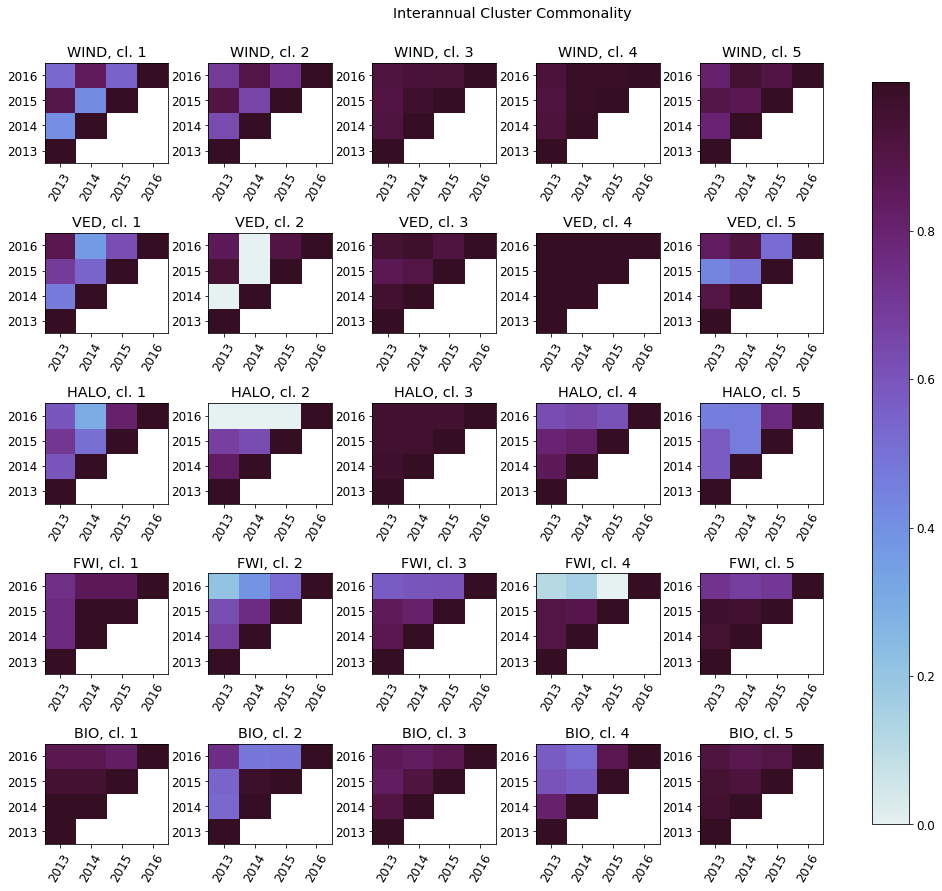

In [52]:
tcmap = cm.cm.dense
plt.rcParams.update({'font.size': 12})
fact = 0.8
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(18*fact, 15*fact))
cmap = tcmap
section_slice = np.arange(2013,2018,1)

    
tgraph = [WIND_overlaps_cl_1,WIND_overlaps_cl_2,WIND_overlaps_cl_3,\
         WIND_overlaps_cl_4,WIND_overlaps_cl_5]; tit = 'WIND'
for i in range(0,5):
    tpl = tgraph[i]
    ax = axes[0,i]
    tpl[np.isnan(tpl)] = 1
    
    tpl[0,1:4] = np.nan; tpl[1,2:4] = np.nan; tpl[2,3] = np.nan
    mesh = ax.pcolormesh(section_slice[:],section_slice[:],tpl, cmap = tcmap, vmin=0.0, vmax=1.0 )
    ax.set_xticks([2013.5,2014.5,2015.5,2016.5]); ax.set_xticklabels(['2013','2014','2015','2016'],rotation='60')
    ax.set_yticks([2013.5,2014.5,2015.5,2016.5]); ax.set_yticklabels(['2013','2014','2015','2016'])
    ax.set_title(f'{tit}, cl. {i+1}')
tgraph = [VED_overlaps_cl_1,VED_overlaps_cl_2,VED_overlaps_cl_3,\
         VED_overlaps_cl_4,VED_overlaps_cl_5]; tit = 'VED'
for i in range(0,5):
    tpl = tgraph[i]
    ax = axes[1,i]
    tpl[np.isnan(tpl)] = 1
    
    tpl[0,1:4] = np.nan; tpl[1,2:4] = np.nan; tpl[2,3] = np.nan
    mesh = ax.pcolormesh(section_slice[:],section_slice[:],tpl, cmap = tcmap, vmin=0.0, vmax=1.0 )
    ax.set_xticks([2013.5,2014.5,2015.5,2016.5]); ax.set_xticklabels(['2013','2014','2015','2016'],rotation='60')
    ax.set_yticks([2013.5,2014.5,2015.5,2016.5]); ax.set_yticklabels(['2013','2014','2015','2016'])
    ax.set_title(f'{tit}, cl. {i+1}')
    
tgraph = [HALO_overlaps_cl_1,HALO_overlaps_cl_2,HALO_overlaps_cl_3,\
         HALO_overlaps_cl_4,HALO_overlaps_cl_5]; tit = 'HALO'
for i in range(0,5):
    tpl = tgraph[i]
    ax = axes[2,i]
    tpl[np.isnan(tpl)] = 1
    
    tpl[0,1:4] = np.nan; tpl[1,2:4] = np.nan; tpl[2,3] = np.nan
    mesh = ax.pcolormesh(section_slice[:],section_slice[:],tpl, cmap = tcmap, vmin=0.0, vmax=1.0 )
    ax.set_xticks([2013.5,2014.5,2015.5,2016.5]); ax.set_xticklabels(['2013','2014','2015','2016'],rotation='60')
    ax.set_yticks([2013.5,2014.5,2015.5,2016.5]); ax.set_yticklabels(['2013','2014','2015','2016'])
    ax.set_title(f'{tit}, cl. {i+1}')
    
tgraph = [FWI_overlaps_cl_1,FWI_overlaps_cl_2,FWI_overlaps_cl_3,\
         FWI_overlaps_cl_4,FWI_overlaps_cl_5]; tit = 'FWI'
for i in range(0,5):
    tpl = tgraph[i]
    ax = axes[3,i] 
    tpl[np.isnan(tpl)] = 1
    
    tpl[0,1:4] = np.nan; tpl[1,2:4] = np.nan; tpl[2,3] = np.nan
    mesh = ax.pcolormesh(section_slice[:],section_slice[:],tpl, cmap = tcmap, vmin=0.0, vmax=1.0 )
    ax.set_xticks([2013.5,2014.5,2015.5,2016.5]); ax.set_xticklabels(['2013','2014','2015','2016'],rotation='60')
    ax.set_yticks([2013.5,2014.5,2015.5,2016.5]); ax.set_yticklabels(['2013','2014','2015','2016'])
    ax.set_title(f'{tit}, cl. {i+1}')
tgraph = [BIO_overlaps_cl_1,BIO_overlaps_cl_2,BIO_overlaps_cl_3,\
         BIO_overlaps_cl_4,BIO_overlaps_cl_5]; tit = 'BIO'
for i in range(0,5):
    tpl = tgraph[i]
    ax = axes[4,i]
    tpl[np.isnan(tpl)] = 1; 
    tpl[0,1:4] = np.nan; tpl[1,2:4] = np.nan; tpl[2,3] = np.nan
    mesh = ax.pcolormesh(section_slice[:],section_slice[:],tpl, cmap = tcmap, vmin=0.0, vmax=1.0 )
    ax.set_xticks([2013.5,2014.5,2015.5,2016.5]); ax.set_xticklabels(['2013','2014','2015','2016'],rotation='60')
    ax.set_yticks([2013.5,2014.5,2015.5,2016.5]); ax.set_yticklabels(['2013','2014','2015','2016'])
    ax.set_title(f'{tit}, cl. {i+1}')

plt.tight_layout()
cbar = fig.colorbar(mesh, ax=axes.ravel().tolist(), shrink=0.95)

cbar.set_ticks(np.arange(0, 1.0, 0.2))
#cbar.set_ticklabels(['low', 'medium', 'high'])



plt.suptitle('Interannual Cluster Commonality', y = 1.03)


this can be read as "intersection of (y axis and x axis cluster)/ size of y axis cluster"

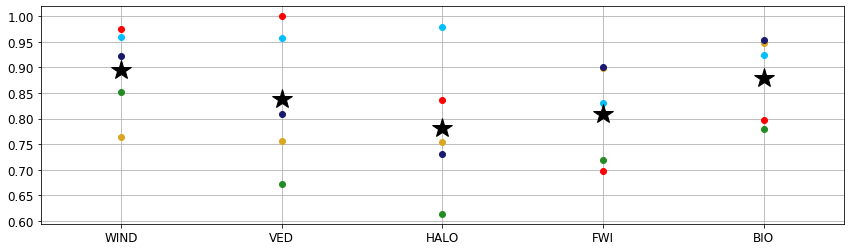

In [60]:
colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18*fact, 5*fact))
   
tgraph = [WIND_overlaps_cl_1,WIND_overlaps_cl_2,WIND_overlaps_cl_3,\
         WIND_overlaps_cl_4,WIND_overlaps_cl_5]; tit = 'WIND'
c_ar = np.zeros([1,5])
for c in range(0,5):
    ax.plot(1,np.nanmean(tgraph[c]),marker = 'o', color = colors[c+1])
    c_ar[0,c] = np.nanmean(tgraph[c])
    
ax.plot(1,np.nanmean(c_ar),marker = '*', color = 'k', markersize = 20)        
tgraph = [VED_overlaps_cl_1,VED_overlaps_cl_2,VED_overlaps_cl_3,\
         VED_overlaps_cl_4,VED_overlaps_cl_5]; tit = 'VED'
c_ar = np.zeros([1,5])
for c in range(0,5):
    ax.plot(2,np.nanmean(tgraph[c]),marker = 'o', color = colors[c+1])
    c_ar[0,c] = np.nanmean(tgraph[c])
    
ax.plot(2,np.nanmean(c_ar),marker = '*', color = 'k', markersize = 20)    
tgraph = [HALO_overlaps_cl_1,HALO_overlaps_cl_2,HALO_overlaps_cl_3,\
         HALO_overlaps_cl_4,HALO_overlaps_cl_5]; tit = 'HALO'
c_ar = np.zeros([1,5])
for c in range(0,5):
    ax.plot(3,np.nanmean(tgraph[c]),marker = 'o', color = colors[c+1])
    c_ar[0,c] = np.nanmean(tgraph[c])
    
ax.plot(3,np.nanmean(c_ar),marker = '*', color = 'k', markersize = 20)    
tgraph = [FWI_overlaps_cl_1,FWI_overlaps_cl_2,FWI_overlaps_cl_3,\
         FWI_overlaps_cl_4,FWI_overlaps_cl_5]; tit = 'FWI'
c_ar = np.zeros([1,5])
for c in range(0,5):
    ax.plot(4,np.nanmean(tgraph[c]),marker = 'o', color = colors[c+1])
    c_ar[0,c] = np.nanmean(tgraph[c])
    
ax.plot(4,np.nanmean(c_ar),marker = '*', color = 'k', markersize = 20)    
tgraph = [BIO_overlaps_cl_1,BIO_overlaps_cl_2,BIO_overlaps_cl_3,\
         BIO_overlaps_cl_4,BIO_overlaps_cl_5]; tit = 'BIO'
c_ar = np.zeros([1,5])
for c in range(0,5):
    ax.plot(5,np.nanmean(tgraph[c]),marker = 'o', color = colors[c+1])
    c_ar[0,c] = np.nanmean(tgraph[c])
    
ax.plot(5,np.nanmean(c_ar),marker = '*', color = 'k', markersize = 20)    
    
ax.set_xticks(np.arange(0,6,1))
ax.set_xticklabels(['','WIND','VED','HALO','FWI','BIO'])
ax.set_xlim([0.5,5.5])
ax.grid()